## Optimización sin restricciones
## Josué Acuña

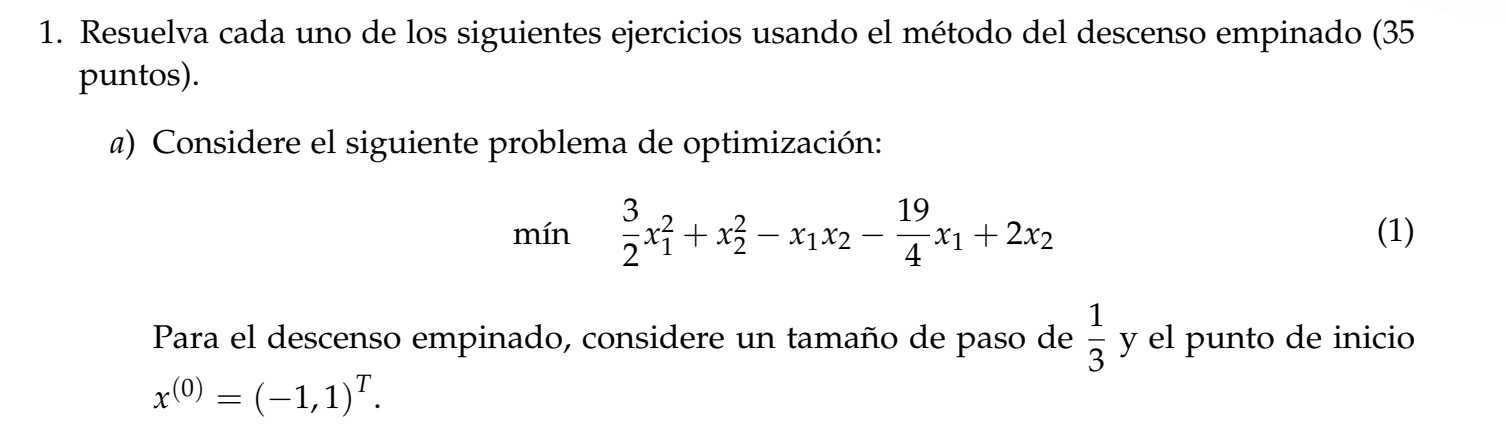

In [39]:
from IPython.display import Image
Image("D:/OneDrive/CIMAT/Optimización/1. Optimización sin restricciones/Gradiente descendente_códigos definitivos/1.jpg")

In [40]:
## Cargamos el script proporcionado. 

In [41]:
###  ¡Cambiar el paso!

import numpy as np
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *

def gradiente_descendente(grad, x0, step_length = (1/3), tol = 1e-6, max_iter = 200, return_history = False):
  # Convertir el punto de inicio en un arreglo de numpy.
  x = np.array(x0, dtype = float)
  if return_history:
    # Crear arreglo donde se almacenará el histórico de las iteraciones
    x_t = x[None, :].copy()
  # Calcular el gradiente y asegurarse que es un arreglo.
  grad_x = np.array(grad(x))
  iter_ = 0
  # Verificar si se cumple el criterio de parada.
  stop = (np.dot(grad_x, grad_x) < tol) or (iter_ > max_iter)
  # Proceso iterativo.
  while not stop:
    # Incrementar el contador de iteraciones.
    iter_ += 1
    # Actualizar la posición del vector x
    x -= (step_length * grad_x)
    if return_history:
      # Guardar el nuevo punto en el histórico de las iteraciones
      x_t = np.append(x_t, x[None, :], axis = 0)
    # Calcular el gradiente en la nueva posición.
    grad_x = np.array(grad(x))
    # Verificar la condición de paro.
    stop = (np.dot(grad_x, grad_x) < tol) or (iter_ > max_iter)
  # Regresar la solución óptima.
  return x if not return_history else (x, x_t)



## Vamos a graficar la función en 3D. 

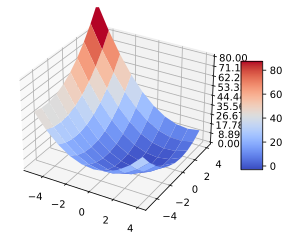

In [42]:
## Aquí ingresaré la ecuación en minúsculas y mayúsculas

def f(x, y):

    return   ((3/2)*(x**2))  +      ( y**2 ) - ( x*y)    -  ((19/4)*x )  +    (2*y)  


x = arange(-5, 5, 1)
y = arange(-5, 5, 1)
X, Y = meshgrid(x, y)
Z =   ((3/2)*(X**2))  +      ( Y**2 ) - ( X*Y)    -  ((19/4)*X)  +    (2*Y)  

fig = figure(3)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-0,80)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
show() 

## Gráfico de contorno

Text(0.5, 1.0, 'Gráfico de contorno')

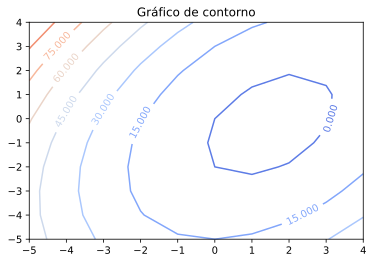

In [43]:


x = arange(-5, 5, 1)
y = arange(-5, 5, 1)
X, Y = meshgrid(x, y)


## Aquí hay que meter la función por segunda vez (en mayùsculas)
Z =   ((3/2)*(X**2))  +      ( Y**2 ) - ( X*Y)    -  ((19/4)*X)  +    (2*Y)  
figure(10)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
clabel(CS, inline=1, fontsize=10)
title('Gráfico de contorno')

## Vamos a calcular el vector gradiente

In [44]:
from sympy import *
x = Symbol('x')
y = Symbol('y')


## Aquí hay que meter la función por tercera vez, pero con minúsculas


## derivada parcial con respecto de X

f =    ((3/2)*(x**2))  +      ( y**2 ) - ( x*y)    -  ((19/4)*x )  +    (2*y)  


fpx = f.diff(x)
print(fpx)

## derivada parcial con respecto de Y

fpy = f.diff(y)

print(fpy)

# función del gradiente:

grad = [fpx, fpy]
print(grad)

3.0*x - y - 4.75
-x + 2*y + 2
[3.0*x - y - 4.75, -x + 2*y + 2]


## Vamos a optimizar y encontrar el mínimo.

In [45]:
### Cambiar el  brinco, la coordenada de arranque, no cambiar más 


eje_x = -1 #x
eje_y = 1 #y
brinco_de_rana = 1/3
iteraciones = 0
check = 0
precision = 0.01
impresion_resultado = True
iteraciones_maximas = 200

while True:
    camino = eje_x - brinco_de_rana*N(fpx.subs(x,eje_x).subs(y,eje_y)).evalf()
    camino2 = eje_y - brinco_de_rana*N(fpy.subs(y,eje_y)).subs(x,eje_x).evalf()
    
    iteraciones += 1
    if iteraciones > iteraciones:
        print("Ajusta el salto, se han alcanzado el máximo de iteraciones")
        printData = False
        break
    if abs(camino-eje_x) < precision and abs(camino2-eje_y) < precision:
        break
    eje_x = camino
    eje_y = camino2
    
if impresion_resultado:
    print("La función "+str(f)+" tiene su mínimo en")
    print("Número de iteraciones alcanzadas:",iteraciones,sep=" ")
    print("eje x",round(camino, 3),sep=" ")
    print("eje y =",round(camino2, 3),sep=" ")

La función 1.5*x**2 - x*y - 4.75*x + y**2 + 2*y tiene su mínimo en
Número de iteraciones alcanzadas: 6
eje x 1.497
eje y = -0.255


## Vamos a volver a optimizar con el script del CIMAT para comparar resultado

In [47]:
# Definiendo el vector gradiente
## Meter las derivadas parciales del vector gradiente que obtuve antes
## Cambiar la coordenada de inicio---------------------------------------

def grad_ex_1(t):
    x = t[0]
    y = t[1]
    return [3.0*x - y - 4.75, -x + 2*y + 2]

# Usando el método del descenso empinado o gradiente descendente.
x_opt_gd, x_his_gd = gradiente_descendente(grad_ex_1, [-1, 1], return_history = True)
print('La solución óptima encontrada por el gradiente descendente está dada por x1: %4.4f y x2: %4.4f'%tuple(x_opt_gd))


La solución óptima encontrada por el gradiente descendente está dada por x1: 1.4997 y x2: -0.2504


## Vamos a graficar el camino seguido en el gráfico de contorno 

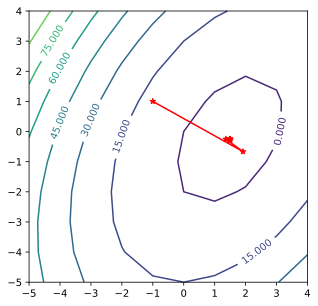

In [50]:
## Meter aquí la ecuación original, en minúsculas

import matplotlib.pyplot as plt
from matplotlib import rcParams
#from matplotlib.pyplot import contour
# Definiendo la función objetivo
def obj_ex_1(t):
    x = t[0]
    y = t[1]
    return ((3/2)*(x**2))  +      ( y**2 ) - ( x*y)    -  ((19/4)*x )  +    (2*y)  
    
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z)
clabel(cp, inline=1, fontsize=10)
ax.plot(x_his_gd[:, 0], x_his_gd[:, 1], 'r-*')

## Generaremos la tabla solicitada con los valores de las iteraciones. 

In [51]:
## No debo olvidar cambiar la coordenada de arranque aquí, porque luego se me olvida.
## Meter el vector otra vez

import pandas as pd
xtmasuno = gradiente_descendente(grad_ex_1, [-1,1], return_history = True)
principio = xtmasuno[1]
principio
xtmasi_final = pd.DataFrame(principio[1:40,])
freim = pd.DataFrame(principio)
def funcion(X):
    for i, j in X.itertuples(index=False):
        x = X[0]
        y = X[1] ## Hay que meter aquí el vector, pero con signos inversos
        return [-(3.0*x - y - 4.75),   -(-x + 2*y + 2)]
    

def funcion2(X):
    for i, j in X.itertuples(index=False):
        x = X[0]
        y = X[1] 
        return ((x**2) +   (y**2))


gato = funcion(freim)
gato2 = pd.DataFrame(gato)
gato2 = gato2.transpose()

ultima_columna = funcion2(gato2)

df_all_rows = pd.concat([freim,  gato2, xtmasi_final, ultima_columna], axis = 1)
df_all_rows =  df_all_rows.round(4)
df_all_rows= df_all_rows.set_axis(['V', 'W', 'X', 'Y', 'Z', "YI", "ultima"], axis=1, inplace=False)
df_all_rows['V'] = df_all_rows['V'].astype(str)
df_all_rows['W'] = df_all_rows['W'].astype(str)
df_all_rows['X'] = df_all_rows['X'].astype(str)
df_all_rows['Y'] = df_all_rows['Y'].astype(str)
df_all_rows['Z'] = df_all_rows['Z'].astype(str)
df_all_rows["YI"] = df_all_rows["YI"].astype(str)
df_all_rows[ "||∇f2|| "] = df_all_rows[ "ultima"].astype(str)

df_all_rows['x(t)'] = df_all_rows['V'] + ',' + df_all_rows['W']
df_all_rows['d(t)'] = df_all_rows["X"] + ',' + df_all_rows['Y']
df_all_rows['x(t+1)'] = df_all_rows['Z'] + ',' + df_all_rows['YI']
df_all_rows['x(t+1)'] = df_all_rows['Z'] + ',' + df_all_rows['YI']
df_all_rows = df_all_rows.drop(["Y", "X", "V", "W", "Z", "YI", "ultima"], axis = 1)
df_all_rows.index.names = ['Iteración (t)']
tabla_chida = df_all_rows.head(10)
tabla_chida.style.set_properties(**{'background-color': 'white',
                           'color': 'blue'})


,||∇f2||,x(t),d(t),x(t+1)
Iteración (t),,,,
0,101.5625,"-1.0,1.0","8.75,-5.0","1.9167,-0.6667"
1,4.3403,"1.9167,-0.6667","-1.6667,1.25","1.3611,-0.25"
2,0.1929,"1.3611,-0.25","0.4167,-0.1389","1.5,-0.2963"
3,0.0107,"1.5,-0.2963","-0.0463,0.0926","1.4846,-0.2654"
4,0.0012,"1.4846,-0.2654","0.0309,0.0154","1.4949,-0.2603"
5,0.0003,"1.4949,-0.2603","0.0051,0.0154","1.4966,-0.2551"
6,0.0001,"1.4966,-0.2551","0.0051,0.0069","1.4983,-0.2529"
7,0.0,"1.4983,-0.2529","0.0023,0.004","1.499,-0.2515"
8,0.0,"1.499,-0.2515","0.0013,0.0021","1.4995,-0.2508"
